# Exploratory Data Analysis (EDA) of Inter-Beat Interval (IBI) for High vs Low Stress

## Objective:
We aim to compare the Inter-Beat Interval (IBI) feature from Photoplethysmography (PPG) signals in high vs low stress conditions. This involves processing the PPG data, extracting IBI features, and visualizing the comparison using various plots.



In [20]:
import pandas as pd
import numpy as np
import heartpy as hp
import os
import matplotlib.pyplot as plt
import seaborn as sns  # For violin plot
from filtering import apply_filter  # Custom filter function

#### Listing and loading PPG data
a. Function to List CSV Files in Folders

In [21]:
def list_csv_files(filepath):
    abs_path = os.path.abspath(filepath)
    csv_files = [os.path.join(abs_path, f) for f in os.listdir(abs_path) if f.endswith('.csv')]
    return csv_files


b. Function to Load and Preprocess PPG Data
This function loads the CSV data and renames the columns. It returns the band100 values (PPG signal) for further processing.


In [22]:
def load_raw_data(filepath):
    df = pd.read_csv(filepath, header=0)
    df.columns = ['ref256', 'band100']
    return df['band100'].values


#### Data Processing for PPG Signals

a. Function to Process PPG File
This function filters the PPG signal and extracts the IBI feature using heartpy.

In [23]:
# Function to split data into 30-second chunks
def split_into_chunks(signal, chunk_size):
    """
    Splits the signal into chunks of a given size.

    Args:
        signal (array-like): The PPG signal.
        chunk_size (int): Number of samples per chunk.

    Returns:
        list: List of signal chunks.
    """
    return [signal[i:i + chunk_size] for i in range(0, len(signal), chunk_size) if len(signal[i:i + chunk_size]) == chunk_size]

In [24]:
# Function to process a single chunk
def process_ppg_chunk(chunk, sample_rate=100):
    """
    Filters and processes a single PPG chunk using HeartPy.

    Args:
        chunk (array-like): A 30-second PPG signal chunk.
        sample_rate (int): The sampling rate of the signal.

    Returns:
        tuple: Processed working data and measures from HeartPy.
    """
    try:
        filtered_chunk = apply_filter(signal=chunk, filter_type='bandpass', cutoff=[0.7, 2.5], fs=sample_rate, order=3)
        working_data, measures = hp.process(filtered_chunk, sample_rate=sample_rate)
        return working_data, measures
    except Exception as e:
        print(f"Error processing chunk: {e}")
        return None, None

# Function to process a file and split into chunks
def process_ppg_file(filepath, sample_rate=100):
    """
    Processes a PPG file by splitting it into 30-second chunks and analyzing each.

    Args:
        filepath (str): Path to the PPG file.
        sample_rate (int): Sampling rate of the signal.

    Returns:
        list: List of results for each chunk.
    """
    try:
        raw_signal = load_raw_data(filepath)
        chunk_size = sample_rate * 30  # 30 seconds of data
        chunks = split_into_chunks(raw_signal, chunk_size)
        results = []

        for chunk in chunks:
            working_data, measures = process_ppg_chunk(chunk, sample_rate)
            if working_data and measures:
                results.append({'working_data': working_data, 'measures': measures})

        return results
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")
        return []


b. Processing All Files
We process both high and low stress files and store the results in a list of dictionaries.

In [25]:
# Function to process multiple files
def process_files(file_list, file_type, sample_rate=100):
    """
    Processes multiple PPG files.

    Args:
        file_list (list): List of file paths.
        file_type (str): Type of data (e.g., 'high' or 'low').
        sample_rate (int): Sampling rate of the signal.

    Returns:
        list: Combined results from all files.
    """
    all_results = []
    for file_path in file_list:
        file_results = process_ppg_file(file_path, sample_rate)
        for result in file_results:
            result['filename'] = os.path.basename(file_path)
            result['file_type'] = file_type
        all_results.extend(file_results)
    return all_results


In [26]:

filepaths_h = list_csv_files('../../ppg_data/High_MWL/')
filepaths_l = list_csv_files('../../ppg_data/Low_MWL/')

high_mwl_results = process_files(filepaths_h, 'high')
low_mwl_results = process_files(filepaths_l, 'low')

all_results = high_mwl_results + low_mwl_results


/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/

/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for findi

/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dt

Error processing chunk: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------



/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/

Error processing file /Users/ravirajpurohit/Downloads/Developer/ppg_data/Low_MWL/p4l.csv: Length mismatch: Expected axis has 5 elements, new values have 2 elements


/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ravirajpurohit/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/ravirajpurohit/opt/

#### Visualizing Raw and Filtered PPG Signal for a Sample File

This helps us understand the difference between raw and filtered signals.

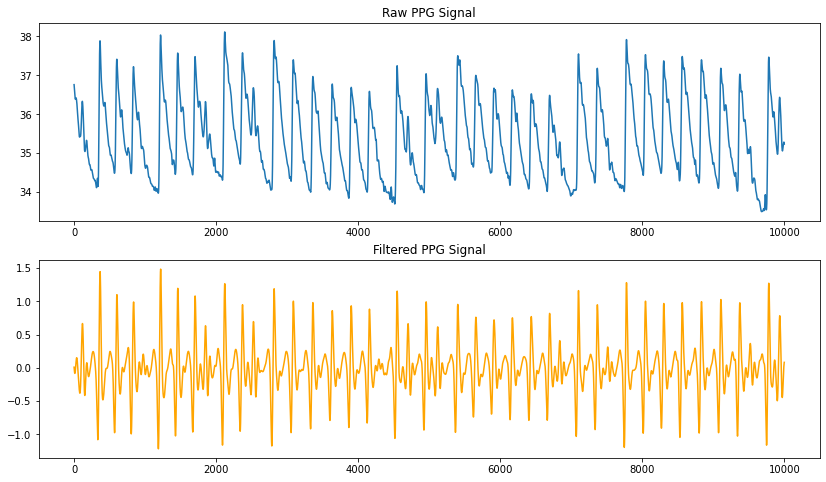

In [48]:
def plot_raw_vs_filtered(filepath):
    ppg_signal = load_raw_data(filepath)
    ppg_signal_filt = apply_filter(signal=ppg_signal, filter_type='bandpass', cutoff=[0.7, 2.5], fs=100, order=3)

    plt.figure(figsize=(14, 8))
    
    plt.subplot(211)
    plt.plot(ppg_signal[:10000], label='Raw Signal')
    plt.title('Raw PPG Signal')
    plt.subplot(212)
    plt.plot(ppg_signal_filt[:10000], label='Filtered Signal', color='orange')
    plt.title('Filtered PPG Signal')
    plt.show()

# Plot for an example high stress file
plot_raw_vs_filtered(filepaths_h[0])


#### IBI Feature Extraction and Visualization
a. Extracting IBI Data for High vs Low Stress

In [47]:
all_results[14]['measures'] == np.nan

{'bpm': 64.86486486486487,
 'ibi': 925.0,
 'sdnn': 25.0,
 'sdsd': 0.0,
 'rmssd': 50.0,
 'pnn20': 1.0,
 'pnn50': 0.0,
 'hr_mad': 25.0,
 'sd1': 0.0,
 'sd2': 0.0,
 's': 0.0,
 'sd1/sd2': nan,
 'breathingrate': nan}

In [56]:
def extract_ibi_data(results):
    ibi_data = {'high': [], 'low': []}
    for result in results:
        ibi = result['measures'].get('ibi')
        if ibi and ~np.isnan(ibi):
            ibi_data[result['file_type']].append(ibi)
    return ibi_data

ibi_data = extract_ibi_data(all_results)


b. Visualizing IBI Comparison

i. Box Plot Comparison

In [61]:
for i in ibi_data.keys():
    print(i, len(ibi_data[i]))

high 521
low 482


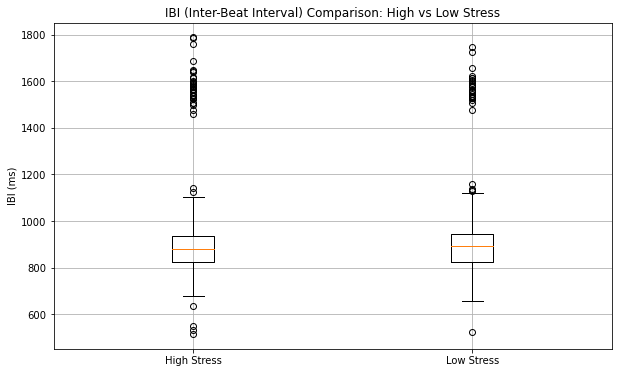

In [57]:
def plot_ibi_boxplot(ibi_data):
    data = [ibi_data['high'], ibi_data['low']]
    labels = ['High Stress', 'Low Stress']
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels)
    plt.title('IBI (Inter-Beat Interval) Comparison: High vs Low Stress')
    plt.ylabel('IBI (ms)')
    plt.grid(True)
    plt.show()

plot_ibi_boxplot(ibi_data)


ii. Violin Plot for Distribution


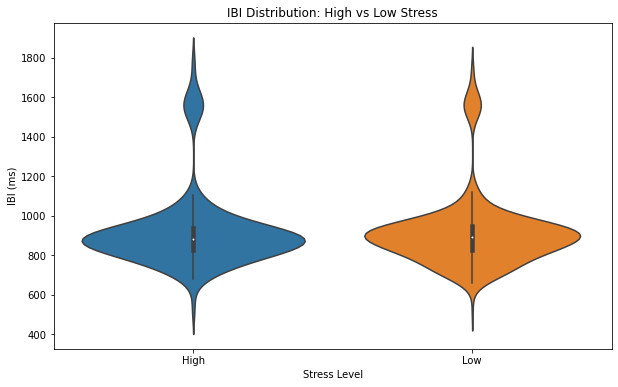

In [29]:
def plot_ibi_violin(ibi_data):
    ibi_df = pd.DataFrame({
        'IBI': ibi_data['high'] + ibi_data['low'],
        'Stress Level': ['High'] * len(ibi_data['high']) + ['Low'] * len(ibi_data['low'])
    })
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Stress Level', y='IBI', data=ibi_df)
    plt.title('IBI Distribution: High vs Low Stress')
    plt.ylabel('IBI (ms)')
    plt.show()

plot_ibi_violin(ibi_data)


iii. Line Plot for Sequential Comparison


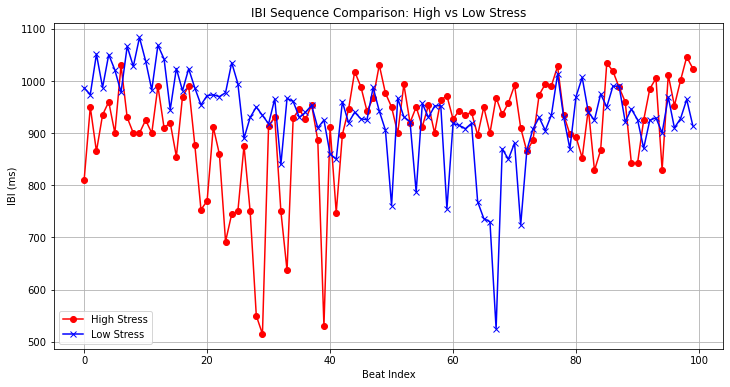

In [62]:
def plot_ibi_line(ibi_data):
    plt.figure(figsize=(12, 6))
    
    plt.plot(ibi_data['high'][:100], label='High Stress', color='red', marker='o')
    plt.plot(ibi_data['low'][:100], label='Low Stress', color='blue', marker='x')
    
    plt.title('IBI Sequence Comparison: High vs Low Stress')
    plt.ylabel('IBI (ms)')
    plt.xlabel('Beat Index')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_ibi_line(ibi_data)
